In [44]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
import numpy as np


In [45]:
# Load the cleaned CSV file
file_path = "Final.csv"  # Update with your actual file path
df_cleaned = pd.read_csv(file_path)

# Normalize column names to avoid mismatches
df_cleaned.columns = df_cleaned.columns.str.strip()  # Remove leading/trailing spaces
df_cleaned.columns = df_cleaned.columns.str.lower()  # Convert to lowercase for consistency

df_cleaned.columns


Index(['county subdivision', 'year', 'median household income',
       'median home value', 'county', 'latitude', 'longitude'],
      dtype='object')

In [46]:

# Load and clean the CSV file
file_path = "Final.csv"  # Update with your actual file path
df_cleaned = pd.read_csv(file_path)

# Normalize column names to avoid mismatches
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower()  # Remove leading/trailing spaces and convert to lowercase

# Rename 'county subdivision' to 'subdivision' and clean the names
df_cleaned = df_cleaned.rename(columns={'county subdivision': 'subdivision'})
df_cleaned["subdivision"] = df_cleaned["subdivision"].str.replace(" CCD", "", regex=False).str.replace(" County", "", regex=False)

# Display the cleaned dataframe
df_cleaned


,subdivision,year,median household income,median home value,county,latitude,longitude
0,"Beavercreek, Clackamas, Oregon",2023,122212,660600,Clackamas,45.287929,-122.535342
1,"Beavercreek, Clackamas, Oregon",2022,114926,644600,Clackamas,45.287929,-122.535342
2,"Beavercreek, Clackamas, Oregon",2021,101283,522900,Clackamas,45.287929,-122.535342
3,"Beavercreek, Clackamas, Oregon",2020,99750,501200,Clackamas,45.287929,-122.535342
4,"Beavercreek, Clackamas, Oregon",2019,93279,468400,Clackamas,45.287929,-122.535342
...,...,...,...,...,...,...,...
110,"Yoder, Clackamas, Oregon",2023,109921,719800,Clackamas,45.138177,-122.681757
111,"Yoder, Clackamas, Oregon",2022,110688,673600,Clackamas,45.138177,-122.681757
112,"Yoder, Clackamas, Oregon",2021,96365,560200,Clackamas,45.138177,-122.681757
113,"Yoder, Clackamas, Oregon",2020,87969,517400,Clackamas,45.138177,-122.681757


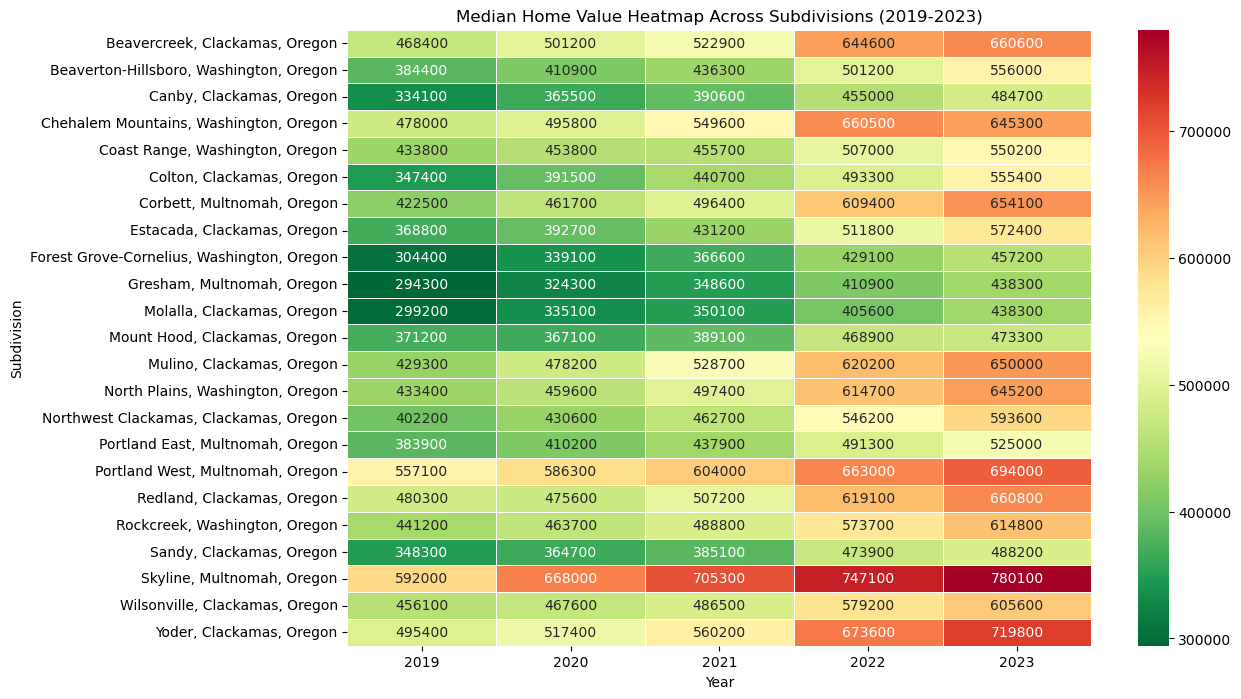

In [47]:
# Load the cleaned dataset
file_path = "Final.csv"  
df_cleaned = pd.read_csv(file_path)

# Normalize column names to avoid mismatches
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower()
df_cleaned = df_cleaned.rename(columns={'county subdivision': 'subdivision'})
df_cleaned["subdivision"] = df_cleaned["subdivision"].str.replace(" CCD", "", regex=False).str.replace(" County", "", regex=False)

# Now create the wide format data for the heatmap
df_wide = df_cleaned.pivot(index='subdivision', columns='year', values='median home value')

# Create a heatmap for each subdivision with a red-to-green color scale
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_wide, 
    annot=True, 
    fmt=".0f", 
    cmap="RdYlGn_r", 
    linewidths=0.5
)

# Customize the plot
plt.title("Median Home Value Heatmap Across Subdivisions (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Subdivision")

# Show the heatmap
plt.show()


In [48]:
# Load the cleaned dataset
file_path = "Final.csv"
df_cleaned = pd.read_csv(file_path)

# Ensure "Year" is numeric
df_cleaned["Year"] = pd.to_numeric(df_cleaned["Year"], errors="coerce")

# Drop rows with missing latitude and longitude values
df_cleaned = df_cleaned.dropna(subset=["Latitude", "Longitude"])

# Create an interactive scatter map for all years
fig = px.scatter_mapbox(
    df_cleaned,
    lat='Latitude',
    lon='Longitude',
    size="Median Home Value",
    color="Median Home Value",
    hover_name="County Subdivision",  # Corrected column name
    hover_data=["County", "Median Home Value", "Year"],
    animation_frame="Year",  # Include all years with animation
    mapbox_style="carto-positron",
    color_continuous_scale=["green", "yellow", "red"],  # Custom color scale
    title="Median Home Values by Subdivisions (2019-2023)"
)

# Increase figure size
fig.update_layout(
    autosize=True,
    width=1200,
    height=800
)

# Show the interactive map
fig.show()


In [49]:
# Calculate the Home Value to Household Income ratio
df["Home Value to Income Ratio"] = df["Median Home Value"] / df["Median Household Income"]

# Create a new DataFrame with selected columns
df_ratio = df[["County Subdivision", "Year", "Median Household Income", "Median Home Value", "Home Value to Income Ratio"]]

# Display the new DataFrame
df_ratio


,County Subdivision,Year,Median Household Income,Median Home Value,Home Value to Income Ratio
0,Beavercreek,2023,122212,660600,5.405361
1,Beavercreek,2022,114926,644600,5.608827
2,Beavercreek,2021,101283,522900,5.162762
3,Beavercreek,2020,99750,501200,5.024561
4,Beavercreek,2019,93279,468400,5.021495
...,...,...,...,...,...
110,Yoder,2023,109921,719800,6.548339
111,Yoder,2022,110688,673600,6.085574
112,Yoder,2021,96365,560200,5.813314
113,Yoder,2020,87969,517400,5.881617


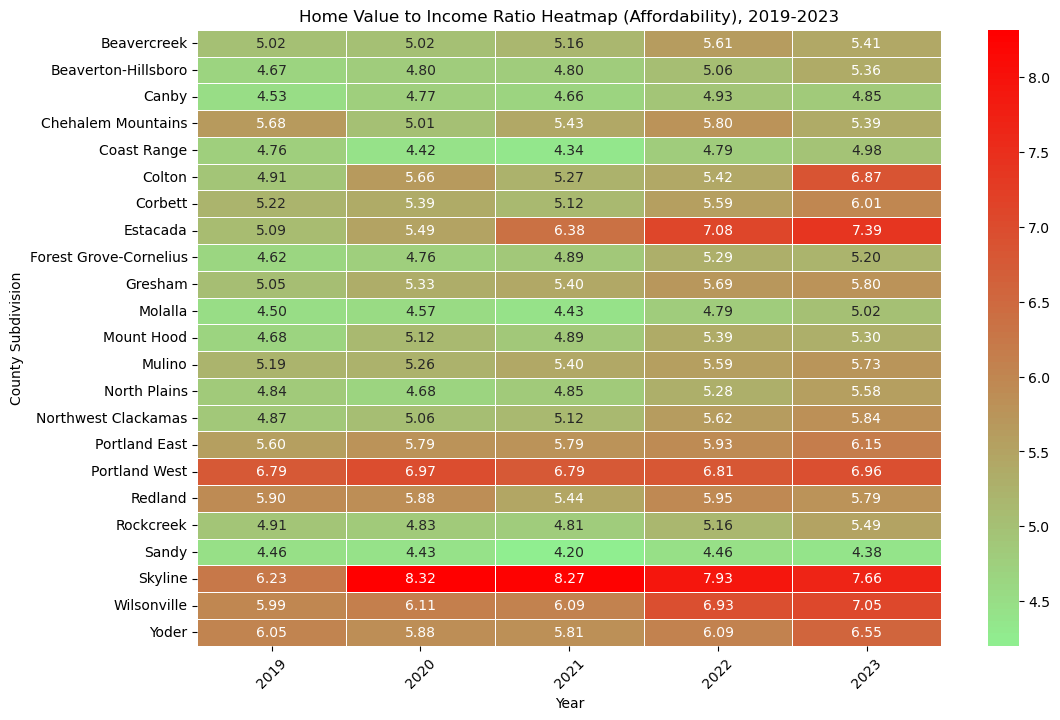

In [50]:
# Calculate the Home Value to Household Income ratio
df["Home Value to Income Ratio"] = df["Median Home Value"] / df["Median Household Income"]

# Function to clean the County Subdivision names
def clean_subdivision_name(name):
    return name.split(",")[0].replace(" CCD", "").strip()

# Apply the function to clean the names
df["County Subdivision"] = df["County Subdivision"].apply(clean_subdivision_name)

# Create a new DataFrame with selected columns
df_ratio = df[["County Subdivision", "Year", "Home Value to Income Ratio"]]

# Pivot the DataFrame for visualization
heatmap_data_cleaned = df_ratio.pivot(index="County Subdivision", columns="Year", values="Home Value to Income Ratio")

# Define a custom colormap: Light green for values < 5, red for values >= 5
colors = ["lightgreen", "red"]
cmap_custom = LinearSegmentedColormap.from_list("custom_cmap", colors, N=100)

# Set up the figure
plt.figure(figsize=(12, 8))

# Create the heatmap with the custom colormap
sns.heatmap(heatmap_data_cleaned, cmap=cmap_custom, annot=True, fmt=".2f", linewidths=0.5)

# Set titles and labels
plt.title("Home Value to Income Ratio Heatmap (Affordability), 2019-2023")
plt.xlabel("Year")
plt.ylabel("County Subdivision")

# Show the heatmap
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [51]:

# Calculate Home Value to Income Ratio
df["Home Value to Income Ratio"] = df["Median Home Value"] / df["Median Household Income"]

# Ensure "Year" is numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Drop rows with missing latitude and longitude values
df = df.dropna(subset=["Latitude", "Longitude"])

# Define a custom color scale where values < 5 are light green, progressing to red
color_scale = [
    (0, "lightgreen"),  # affordable (Ratio < 5)
    (0.5, "yellow"),    # Medium affordability
    (1, "red")          # Least affordable (High Ratio)
]

# Normalize Home Value to Income Ratio for color mapping
df["Normalized Ratio"] = np.clip(df["Home Value to Income Ratio"] / 10, 0, 1)  # Scaling to [0,1]

# Create an interactive scatter map for Home Value to Income Ratio
fig = px.scatter_mapbox(
    df,
    lat='Latitude',
    lon='Longitude',
    size="Home Value to Income Ratio",
    color="Home Value to Income Ratio",
    hover_name="County Subdivision",
    hover_data=["County", "Home Value to Income Ratio", "Year"],
    animation_frame="Year",  # Include all years with animation
    mapbox_style="carto-positron",
    color_continuous_scale=color_scale,  # Custom color scale
    title="Home Value to Income Ratio by Subdivisions (2019-2023)"
)

# Increase figure size
fig.update_layout(
    autosize=True,
    width=1200,
    height=800
)

# Show the interactive map
fig.show()
